# Задание 4

In [11]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [12]:
selection_size = 100

theta = 10
beta = 0.95
alpha = 1.0 - beta
X = np.array([np.random.uniform(theta, 2*theta) for _ in range(selection_size)])

print(X)

[11.70468187 13.45174577 13.9314454  17.16288289 18.23506413 19.60246276
 10.93976537 18.50898451 12.94332757 10.66052442 14.98816979 17.71232822
 11.52655461 13.35536808 10.51482183 12.12125479 17.60120352 16.87117434
 11.92102656 17.90502262 19.90463575 10.60269175 19.63925598 15.6767147
 17.60852576 19.74730232 19.85716638 19.57111816 15.86008498 16.46164476
 17.1340336  15.1606716  16.71020292 12.15983387 12.11038357 10.31155322
 14.53007707 17.75206656 17.94222059 14.13280818 10.15841448 14.51621543
 16.88484022 14.01979968 16.94145118 14.89182786 13.81521474 16.88599836
 16.47395791 11.96345848 14.08436119 19.4160791  10.1371676  17.52518184
 16.11008286 17.08385391 16.1801301  12.47207128 18.08667163 13.70863468
 19.58652234 13.47256776 13.42887686 15.45437576 13.664966   18.19928501
 10.55203338 19.65948386 19.581678   17.33560764 14.92005106 12.99668941
 17.3155409  17.20895053 10.46165133 12.55337289 18.45539515 16.7328602
 17.3571414  10.88036503 12.34055541 10.78559197 19.2

### f) Сгенерируйте выборку объема $n = 100$ для некоторого значения параметра $\theta$. Вычислите указанные выше доверительные интервалы для доверительной вероятности $0.95$.

Точный доверительный интервал

In [13]:
precise_min = np.max(X) / (1 + (beta + alpha/2)**(1/len(X)))
precise_max = np.max(X) / (1 + (alpha/2)**(1/len(X)))

print(f'({precise_min}; {precise_max})')

(9.95357773150205; 10.13586156870769)


Асимптотический доверительный интервал (по ОММ)

In [14]:
alpha_1 = 1/len(X) * np.sum(X)
alpha_2 = 1/len(X) * np.sum([x**2 for x in X])

asymptotic_min = 2/3 * alpha_1 - 1.96 * 2/3 * np.sqrt((alpha_2 - alpha_1**2)/len(X))
asymptotic_max = 2/3 * alpha_1 + 1.96 * 2/3 * np.sqrt((alpha_2 - alpha_1**2)/len(X))

print(f'({asymptotic_min}; {asymptotic_max})')

(9.623190888028972; 10.409075010775705)


### g) Численно постройте бутстраповский доверительный интервал.

Бутстраповский (непараметрический) доверительный интервал

In [15]:
theta_est = lambda X : 2/3 * 1/len(X) * np.sum(X)
N = 1000

subselections = [[X[random.randint(0,len(X)-1)] for i in range(len(X))] for j in range(N)]
deltas = [theta_est(subselections[i]) - theta_est(X) for i in range(N)]
deltas = np.sort(deltas)

k1 = int(N * (1 - beta) / 2) - 1
k2 = int(N * (1 + beta) / 2) - 1

nonparametric_bootstrap_min = deltas[k1] + theta_est(X)
nonparametric_bootstrap_max = deltas[k2] + theta_est(X)

print(f'({nonparametric_bootstrap_min}; {nonparametric_bootstrap_max})')

(9.619832588505364; 10.404470247482582)


Бутстраповский (параметрический) доверительный интервал

In [16]:
theta_est = lambda X : 2/3 * 1/len(X) * np.sum(X)
theta_ = theta_est(X)
N = 50000

subselections = [[np.random.uniform(theta_, 2*theta_) for i in range(len(X))] for j in range(N)]
theta_ests = [theta_est(subselections[i]) for i in range(N)]
theta_ests = np.sort(theta_ests)

k1 = int(N * (1 - beta) / 2) - 1
k2 = int(N * (1 + beta) / 2) - 1

parametric_bootstrap_min = theta_ests[k1]
parametric_bootstrap_max = theta_ests[k2]

print(f'({parametric_bootstrap_min}; {parametric_bootstrap_max})')

(9.638253617290303; 10.39641378246843)


### h) Сравнить все интервалы.

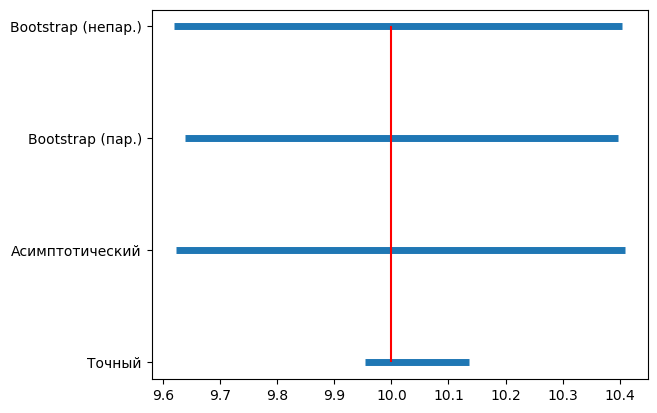

<Figure size 640x480 with 0 Axes>

In [22]:
I_min = [precise_min, asymptotic_min, parametric_bootstrap_min, nonparametric_bootstrap_min]
I_max = [precise_max, asymptotic_max, parametric_bootstrap_max, nonparametric_bootstrap_max]

x = ["Точный", "Асимптотический", "Bootstrap (пар.)", "Bootstrap (непар.)"]

fig, ax = plt.subplots()

ax.hlines(x, I_min, I_max, linewidth=5)
ax.vlines(theta, 0, len(x)-1, colors=['red'])

plt.show()
plt.savefig("Сравнение доверительных интервалов")